In [3]:
#Packages
%pylab
%matplotlib inline
import numpy as np
from scipy import stats
import scipy.ndimage
import matplotlib.pyplot as plt
from images_segmentation import otsu as ot

Using matplotlib backend: <object object at 0x0000014B9078EC00>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
# functions that still have to be defined: otsu_t(); otsu_i() and crop(image, first pixel coordinates, last pixel coordinates)
def crop(image,x,y,w,z):
    h = w-x
    w = z-y
    cropped = np.zeros([h,w])
    for a in range(x,w):
        for b in range(y,z):
            cropped[a-x,b-y]=image[a,b]
    return cropped

def otsu_t(img,x):
    import matplotlib.pyplot
    import numpy
#bins optimieren.... alles zu 0-255 machen


   # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins, patches = matplotlib.pyplot.hist(img.flatten(),log = 'False',bins = x)

   # initialize threshold value (T = 0) 
    thres = 0
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    bcv = list()
    
    # set up initial values
    for i in range(0,len(n)):
        bclv = 0
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0

        #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
        for j in range(0,i+1):
            w0_sum += n[j]
            mean_sum0 += bins[j]*n[j]
            
        # background class probabilites and class mean levels
        w0 = w0_sum / sum(n)  
        if(sum(n[0:i+1]) != 0):  
             mean_0 = mean_sum0 / sum(n[0:i+1])
        else: mean_0 = 0
        
        # compute background class variance
        for m in range(0,i+1):
            v0_sum += ((bins[m]-mean_0)** 2) * n[m]
        
        v0 = v0_sum / sum(n[0:i+1])
        
        # sum up the probabilites of each intensity value;  and the mean value
        for k in range(i+1, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += bins[k]*n[k]

        # compute foreground class probabilities and class mean levels    
        w1 = w1_sum / sum(n)
     
        if(sum(n[i+1:len(n)]) != 0):
            mean_1 = mean_sum1 / sum(n[i+1:len(n)])
        else: mean_1 = 0
        # compute foreground class variance 
        for s in range(i+1,len(n)):
            v1_sum += ((bins[s]-mean_1) ** 2) * n[s]
        if( sum(n[i+1:len(n)]) != 0):
            v1 = v1_sum / sum(n[i+1:len(n)])
        else: v1 = 0

        # compute within class variance and append to list
        bclv = (w0 * v0) + (w1 * v1)
        bcv.append(bclv)

    # select optimal threshold value, minimum value of within class variance
    optimal_thres = min(bcv)
    return optimal_thres

def otsu_i(image):
    img=ot.otsu_thresholding(image, 256)
    i = img.shape[0]
    j = img.shape[1]
    it = np.empty([i,j,1], dtype=str)
    for x, y in np.ndindex((i-1,j-1)):
            if img[x,y] != 0:
                it[x,y,0]='f'
            else:
                it[x,y,0]='b'
    return it


In [5]:
#sliding window average treshold method
#does not work yet
def t_sw(image, stepsize, framesize):
    img = copy(image)
    array = np.zeros([img.shape[0],img.shape[1],2])
    x=0
    y=0
    while y+framesize<=img.shape[1]:
        while x+framesize<=img.shape[0]:
            window=crop(img,x,y,x+framesize, y+framesize)
            otsu_t(window, 256)
            for a, b in np.ndindex(window.shape[0], window.shape[1]):
                a+=x
                b+=y
                threshold = otsu_t(window, 256)
                array[a,b,0]+=threshold
                array[a,b,1]+=1
            x+=stepsize
        y+=stepsize
        for i, j in np.ndindex(img.shape[0], img.shape[1]):
            t=array[i,j,0]/array[i,j,1]
            if img[i,j]<=t:
                img[i,j]=0
            else:
                img[i,j]=255
            return img



In [14]:
#sliding window foreground background assignment
#also does not work yet
def i_sw(image,stepsize,framesize):
    img=copy(image)
    intensity=np.max(img)
    array=np.empty([img.shape[0],img.shape[1],1], dtype=str)
    x=0
    y=0
    while y+framesize<=img.shape[1]:
        while x+framesize<=img.shape[0]:
            window=crop(img,x,y,x+framesize, y+framesize)
            it = otsu_i(window)
            for a, b in np.ndindex(window.shape[0], window.shape[1]):
                c=a+x
                d=b+y
                array[c,d,0]+=it[a,b,0]
            x+=stepsize
        y+=stepsize
    for i, j in np.ndindex(img.shape[0], img.shape[1]):
        a=scipy.stats.mode(array[i,j])
        if a=='b':
            img[i,j]=0
        else:
            img[i,j]=intensity
    print(img)
    figure()
    imshow(img,'gray')
    return img
                


array([[['f'],
        ['f'],
        ['f'],
        ...,
        ['b'],
        ['b'],
        ['']],

       [['f'],
        ['f'],
        ['f'],
        ...,
        ['b'],
        ['b'],
        ['']],

       [['f'],
        ['f'],
        ['f'],
        ...,
        ['b'],
        ['b'],
        ['']],

       ...,

       [['b'],
        ['b'],
        ['b'],
        ...,
        ['b'],
        ['b'],
        ['']],

       [['b'],
        ['b'],
        ['b'],
        ...,
        ['b'],
        ['b'],
        ['']],

       [[''],
        [''],
        [''],
        ...,
        [''],
        [''],
        ['']]], dtype='<U1')

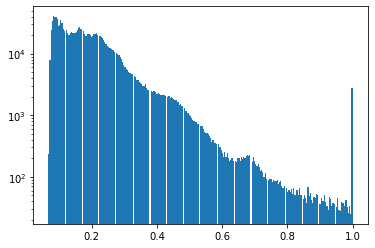

In [11]:
imgdna44 = imread (r"data\Otsu_data\NIH3T3\img\dna-44.png")
otsu_i(imgdna44)

c:\Users\ievas\Desktop\2022-topic-01-team-04\images_segmentation\otsu.py:61: RuntimeWarning: invalid value encountered in double_scalars
  v0 = v0_sum / sum(n[0:i+1])


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


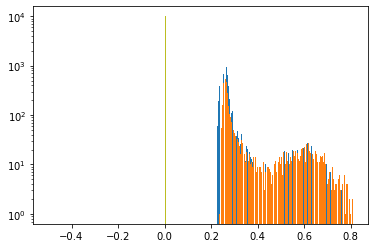

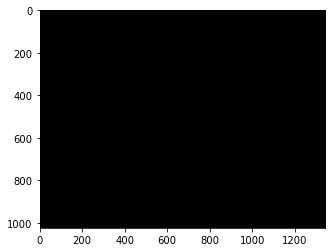

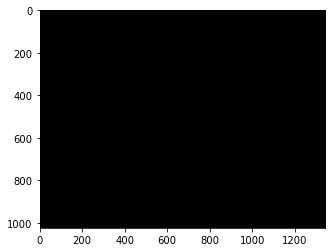

In [15]:
img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif")
newimg44 = i_sw(imgdna44, 50, 100)
figure()
imshow(newimg44,'gray')